This is based on the simulations done in 
# Factors Influencing the Detectability of Early Warning Signals of Population Collapse

This is a simulation of a onlinear equation with multiplicative noise using a Heun method where the noise only applies on the variable and not the parameter. 

\begin{equation}
\dot{x}=[rx(1-x/K)-\lambda\frac{x^2}{x^2+h^2}]dt+\sigma x dW
\end{equation}

where $x$ is a random variable and $\lambda$ is a swiped parameter determined by $\dot{\lambda}=c_\lambda$. Here $c_\lambda=[0.025,0.03,...,0.07]$
r=1, k=100, h=1, c_0=1


In [1]:
import os 
cwd = os.getcwd()
import sys
#sys.path.append("C:/Users/928814/Documents/global_python_codes/Metrics_thresholds_boots") # go to parent dir
import sympy as sp
import numpy as np
import sdeint
#import metrics
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams.update({'font.size': 18})

In [2]:
xs, rs, ks, hs, cs, a, ls = sp.symbols('x r k h c a lambda')
eq=rs*xs*(1-xs/ks)-ls*(xs**2)/(xs**2+hs**2)
eq2=eq.subs(hs, 1)
eq2=eq2.subs(rs, 1)
eq3=1*(1-xs/100)-ls*(xs)/(xs**2+1**2)
sp.solve(eq3, xs)

[-(9997 - 300*lambda)/(3*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3,
 -(9997 - 300*lambda)/(3*(-1/2 - sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3,
 -(9997 - 300*lambda)/(3*(-1/2 + sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3]

In [3]:
Mx=sp.diff(eq,xs)
Mx=sp.diff(eq3,xs)
Mx

2*lambda*x**2/(x**2 + 1)**2 - lambda/(x**2 + 1) - 1/100

In [4]:
M0=Mx.subs(xs, 0)
M0

-lambda - 1/100

In [5]:
sp_xu=-(9997 - 300*ls)/(3*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3

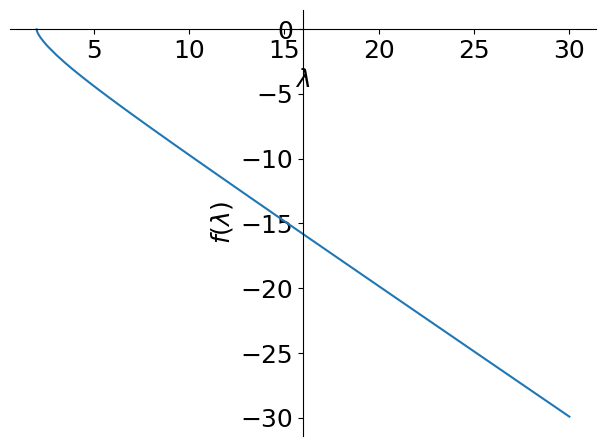

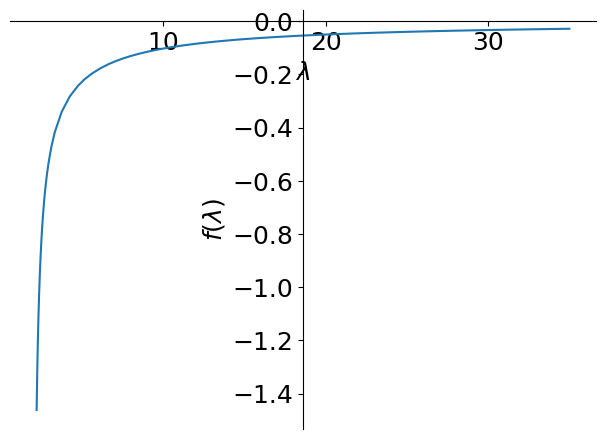

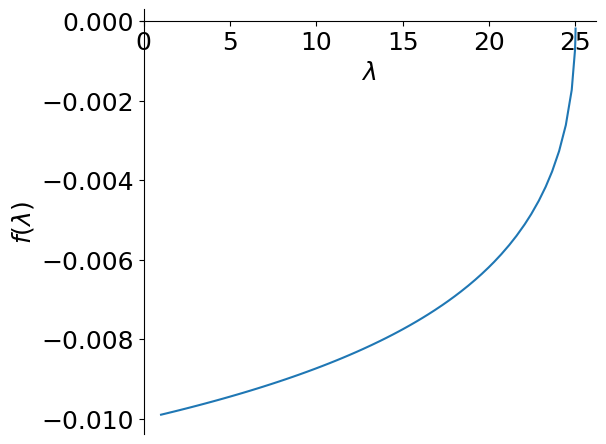

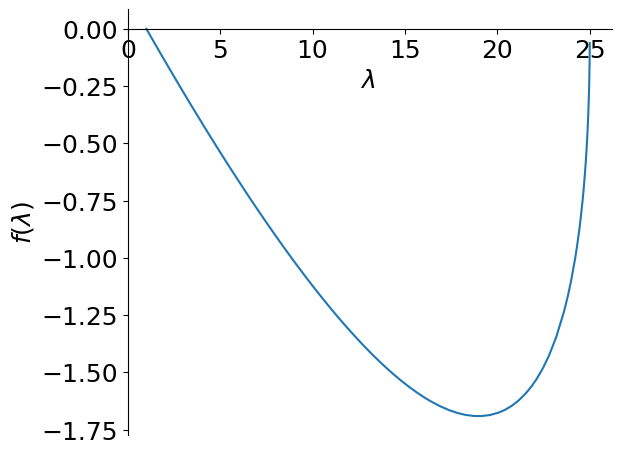

In [6]:
mr=Mx.subs(xs,sp_xu)
p1=sp.plotting.plot(mr, (ls, 1, 30))
p1=sp.plotting.plot(1/mr, (ls, 2.2, 35))

sp_xu2=-(9997 - 300*ls)/(3*(-1/2 + sp.sqrt(3)*1j/2)*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + sp.sqrt(3)*1j/2)*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3
mr2=Mx.subs(xs,sp_xu2)
p1=sp.plotting.plot(mr2, (ls, 1, 26))

p1=sp.plotting.plot(mr2*(ls-1)/0.07, (ls, 1, 26))


In [7]:
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from matplotlib import cm
cmap =cm.get_cmap('turbo')


C:\Users\jp928814\AppData\Local\Temp\ipykernel_10248\1611679012.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap('turbo')


In [8]:
def s1(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3


def s2(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(-1/2 - np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 - np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3


def s3(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(-1/2 + np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3

lvar=np.linspace(0,28,6900)



## Test using a single initial condition some distance from the critical value

0


C:\Users\jp928814\AppData\Local\Temp\ipykernel_10248\552206149.py:94: RuntimeWarning: divide by zero encountered in log10
  lc.set_array(np.log10(np.abs(drdt[window])))


20


C:\Users\jp928814\AppData\Local\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


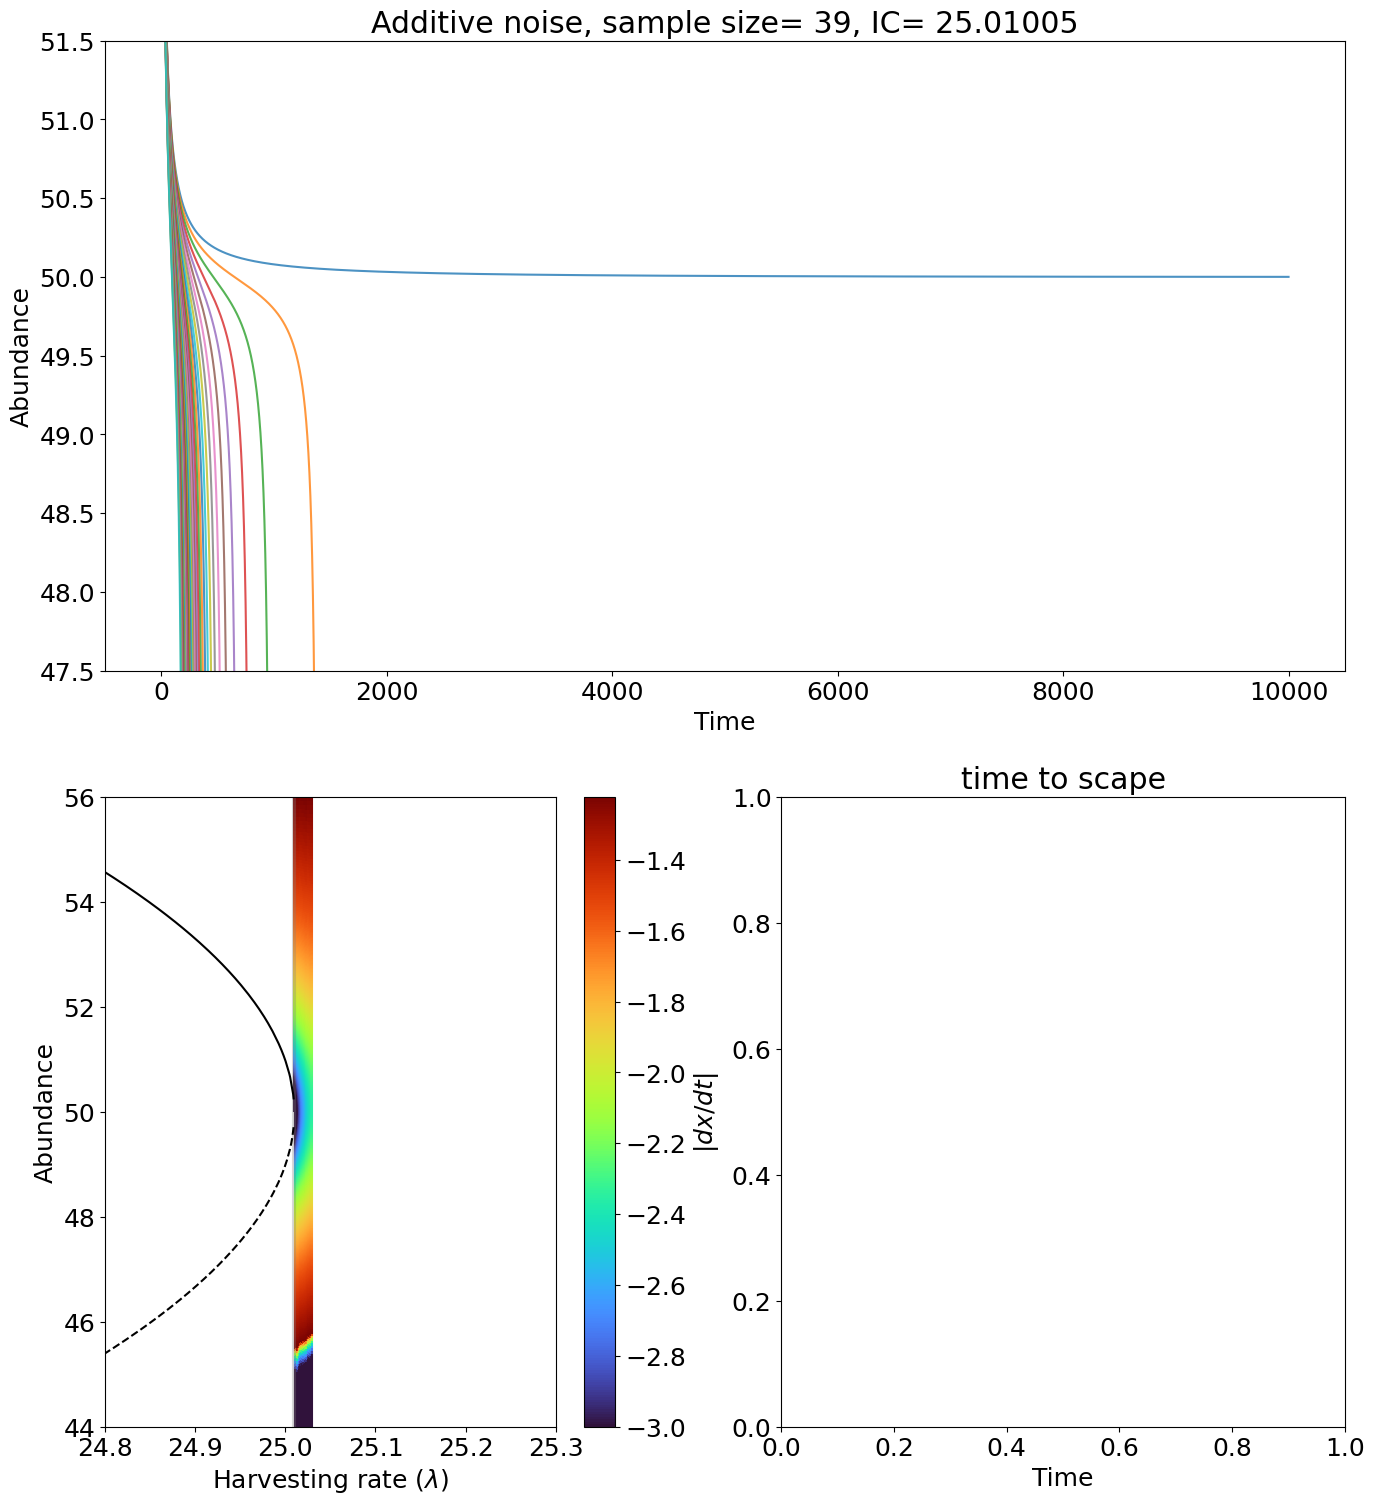

In [9]:
from matplotlib.collections import LineCollection
import cmocean
import matplotlib.colors as mcolors

crit=1

k=100
r=1
h=1 
cases=500
t_final=10000

li=25.01+0.00005
s=0.0008
l0=li
lf=28
# cl=np.sign(lf-l0)*cls[j]

#deltas=np.arange(24.9,25.1,0.0005)
deltas=np.arange(25.01,25.03,0.0005)


t_rm=np.abs(0.9)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

x0= 56#50  
    
#N=np.zeros((cases,len(tspan)))


t_scape=np.zeros((cases))
threshold=48
    

fig=plt.figure(figsize=(16, 18))
ax=fig.add_subplot(223)
ax2=fig.add_subplot(211)
ax3=fig.add_subplot(224)
lvar=np.linspace(26,24,20000)


def f(x, t):
    l=l0
    A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
    return A

def g(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = s*x0/4 # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B


for j in range(len(deltas)):
    l0=deltas[j]
    res_det=odeint(f, x0, tspan)


    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    cl=0
    l1=l0+cl*tspan
    #dl=cl*tspan[1]-l0


    try:
        index = np.argwhere(res_det < threshold)[0][0]
        t_scape[j]=tspan[index]
    except:
        t_scape[j]=0
        
    #N[j,:]=res.reshape(len(tspan), )
    drdt = np.gradient(np.squeeze(res_det))
    window=  np.abs(drdt)<0.06
    

    # ax.plot(l1,res_det,alpha=0.8)
    
    points = np.array([l1, np.squeeze(res_det)]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    clim=np.log10([0.001,0.06])
    
    # Create a LineCollection using the line segments
    lc = LineCollection(segments, cmap='turbo')
     
    lc.set_array(np.log10(np.abs(drdt[window])))
    lc.set_clim(clim[0],clim[1])

    #lc.set_clim(z_min, z_max)
    # Add the LineCollection to the plot
    ax.add_collection(lc)


    ax2.plot(tspan,res_det,alpha=0.8)
    if j%20==0: print(j)
    # ax.plot(tspan,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8)
  
ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.3)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('')
ax.set_ylim([44,56])

#cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
#norm = BoundaryNorm(np.sort(cls), cmap.N)
#cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
#cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
#ax.set_ylim([-1,60])
ax.set_xlim([24.8,25.3])

ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
ax2.set_ylim([47.5,51.5])

data=t_scape[t_scape>1]

ax2.set_title('Additive noise, sample size= %.i, IC= %.5f' %(len(data),li))

ax3.set_ylabel('')
ax3.set_xlabel('Time')
ax3.set_title('time to scape')
cbar=plt.colorbar(lc)
cbar.set_label(r'$|dx/dt|$')


<IPython.core.display.Javascript object>


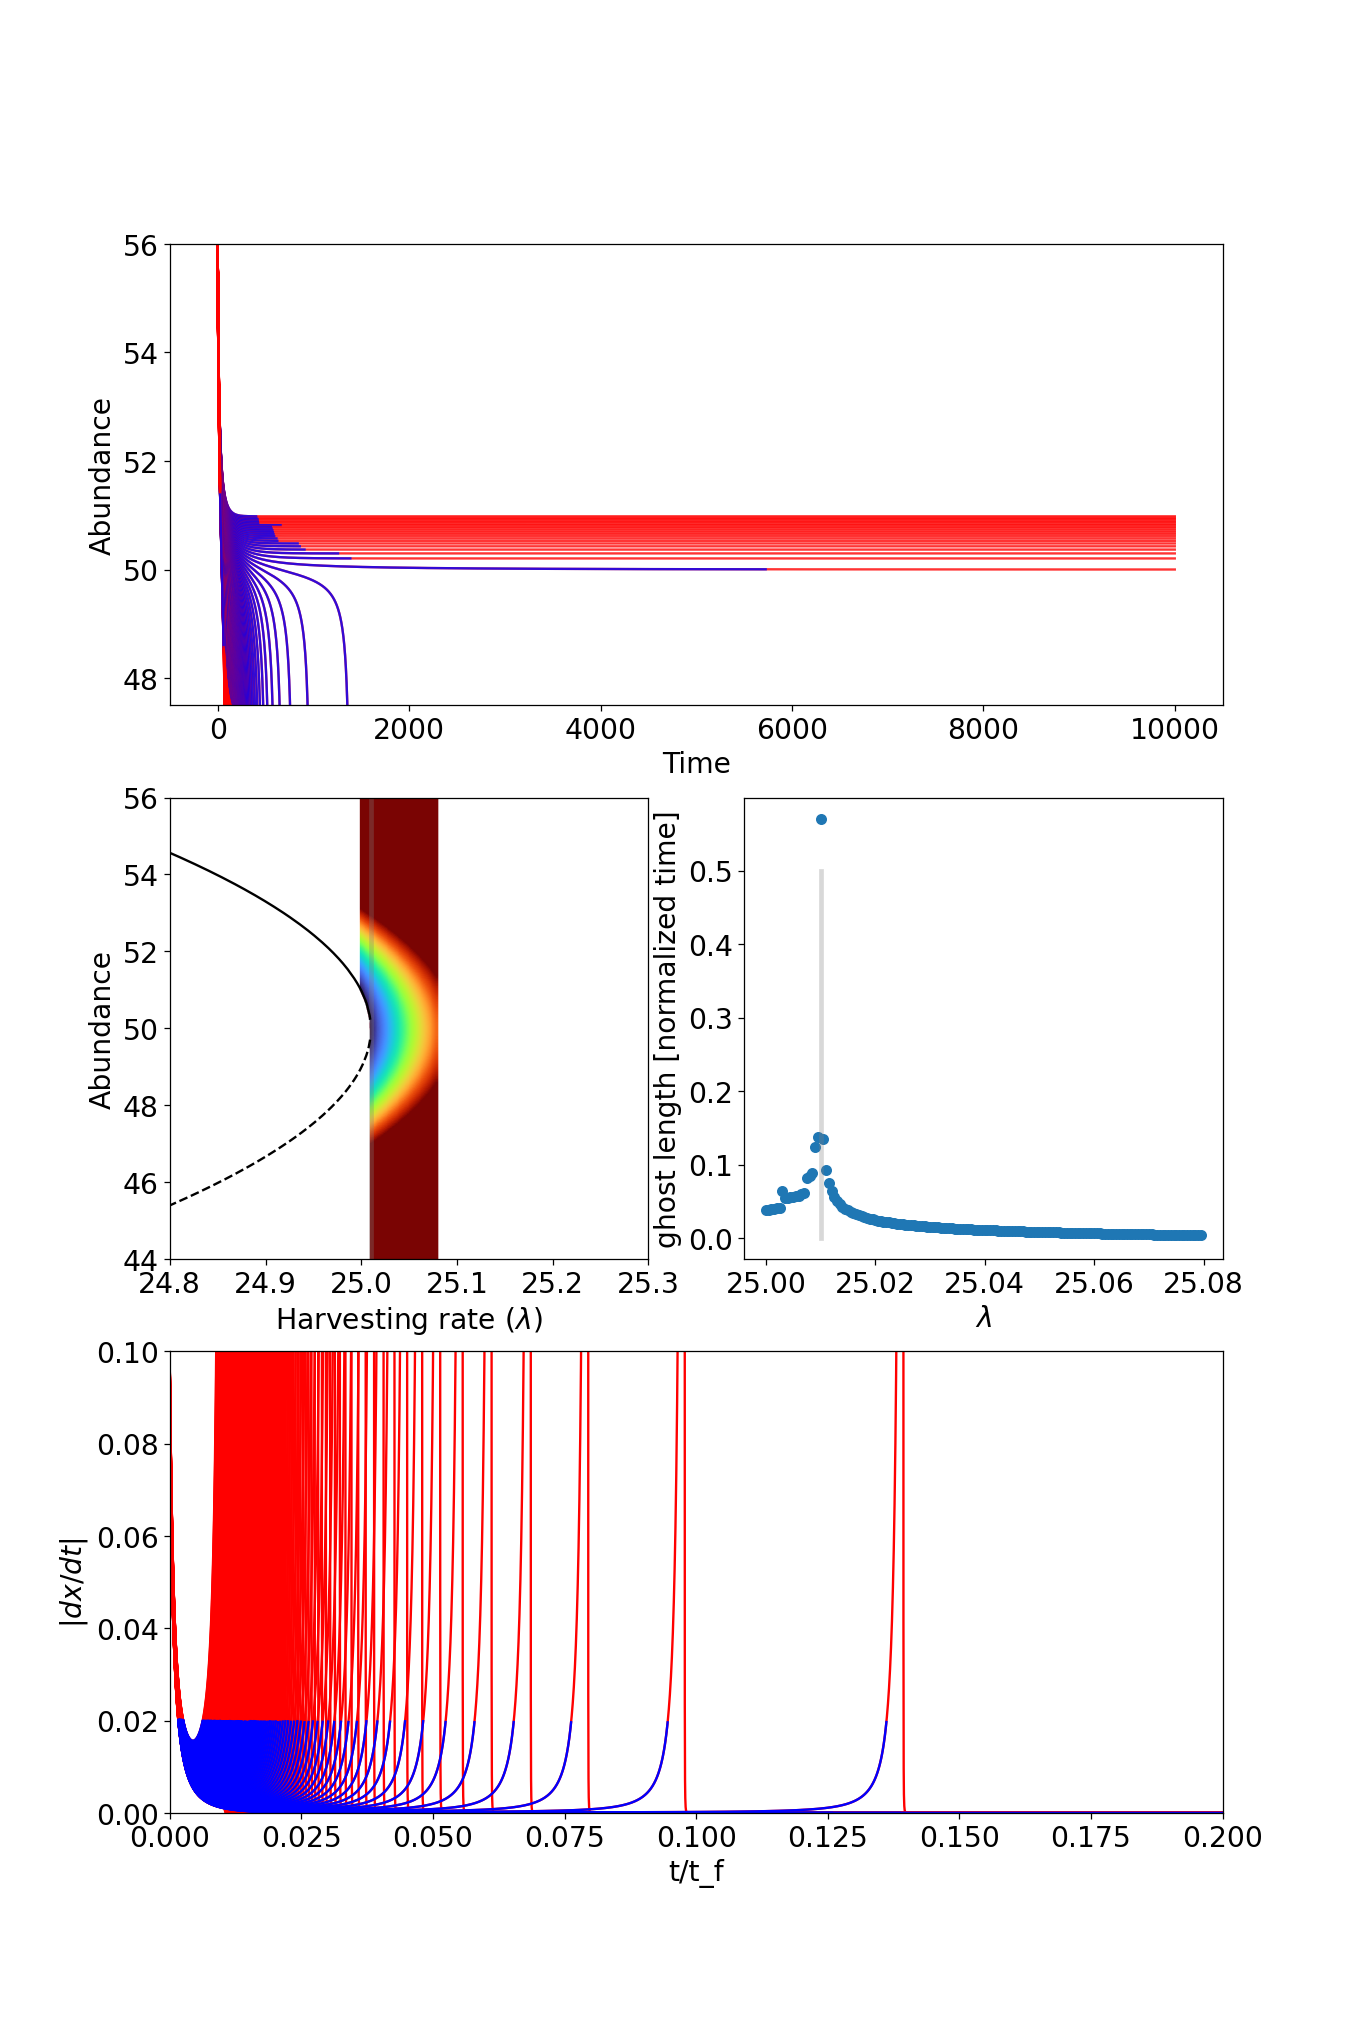

0
20
40
60
80
100
120
140


In [18]:
from matplotlib.collections import LineCollection
import cmocean
import matplotlib.colors as mcolors
from scipy.signal import argrelextrema
%matplotlib notebook


def truncate_at_threshold(arr, threshold):
    """
    Truncates an array at the point where it crosses a threshold.

    Parameters
    ----------
    arr : array_like
        Input array.
    threshold : float
        Threshold value.

    Returns
    -------
    array_like
        Truncated array.
    """
    # Find the index of the first element that crosses the threshold
    idx = np.argmax(arr >= threshold)

    # Return the elements up to that index
    return arr[:idx]


crit=1




k=100
r=1
h=1 
cases=500
t_final=10000

li=25.01+0.00005
s=0.0008
l0=li
lf=28
# cl=np.sign(lf-l0)*cls[j]

#deltas=np.arange(24.9,25.1,0.0005)
deltas=np.arange(25.,25.08,0.0005)
min_vel=np.zeros_like(deltas)
ghost_time=np.zeros_like(deltas)

t_rm=np.abs(0.9)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)
x0= 56#50  
    
#N=np.zeros((cases,len(tspan)))


t_scape=np.zeros((cases))
threshold=48
    

fig=plt.figure(figsize=(12, 18))
ax=fig.add_subplot(323)
ax2=fig.add_subplot(311)
ax3=fig.add_subplot(324)
ax4=fig.add_subplot(313)
lvar=np.linspace(26,24,20000)


def f(x, t):
    l=l0
    A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
    return A

def g(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = s*x0/4 # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B


for j in range(len(deltas)):
    l0=deltas[j]
    res_det=odeint(f, x0, tspan)


    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    cl=0
    l1=l0+cl*tspan
    #dl=cl*tspan[1]-l0


    try:
        index = np.argwhere(res_det < threshold)[0][0]
        t_scape[j]=tspan[index]
    except:
        t_scape[j]=0
        
    #N[j,:]=res.reshape(len(tspan), )
    drdt = np.gradient(np.squeeze(res_det))
    abs_drdt=np.abs(np.gradient(np.squeeze(res_det)))
    thresh_drdt=0.02
    window=  np.abs(drdt)< thresh_drdt
    idx = argrelextrema(np.abs(abs_drdt- thresh_drdt), np.less)[0][1]
    idx_min = argrelextrema(np.abs(abs_drdt- thresh_drdt), np.less)[0][0]

    min_vel[j]=res_det[argrelextrema(abs_drdt, np.less)[0][0]]

    # ax.plot(l1,res_det,alpha=0.8)
    
    points = np.array([l1, np.squeeze(res_det)]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    clim=[0., thresh_drdt]
    
    # Create a LineCollection using the line segments
    lc = LineCollection(segments, cmap='turbo')
     
    lc.set_array(np.abs(drdt[:idx]))
    lc.set_clim(clim[0],clim[1])

    #lc.set_clim(z_min, z_max)
    # Add the LineCollection to the plot
    ax.add_collection(lc)


    ax2.plot(tspan,res_det,'r',alpha=0.8)
    ax2.plot(tspan[idx_min:idx],res_det[idx_min:idx],'b',alpha=0.8)
    if j%20==0: print(j)
    # ax.plot(tspan,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8)
    
    
    ax4.plot(tspan[idx_min:idx]/t_final,np.abs(drdt[idx_min:idx]),'b',zorder=1)
    ax4.plot(tspan/t_final,np.abs(drdt),'r',zorder=0)
    ax4.set_xlim([0,0.2])
    ax4.set_ylim([0,0.1])
    ax4.set_xlabel('t/t_f')
    ax4.set_ylabel('$|dx/dt|$')
    
    ghost_time[j]=(tspan[idx]-tspan[idx_min])/t_final
    
ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.3)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('')
ax.set_ylim([44,56])
ax.plot(deltas,min_vel,'--',color='pink',lw=2,zorder=1)
#cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
#norm = BoundaryNorm(np.sort(cls), cmap.N)
#cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
#cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
#ax.set_ylim([-1,60])
ax.set_xlim([24.8,25.3])

ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
ax2.set_ylim([47.5,x0])

data=t_scape[t_scape>1]


ax3.scatter(deltas,ghost_time)
ax3.plot([25.01,25.01],[0,0.5],color='gray',lw=3,alpha=0.3)

ax3.set_xlabel('$\lambda$')
ax3.set_ylabel('ghost length [normalized time]')
#cbar=plt.colorbar(lc)
#cbar.set_label(r'$|dx/dt|$')
fig.savefig('Deterministic_ghosting.png', dpi=200)

In [11]:
argrelextrema(abs_drdt-abs_drdt[1], np.less)[0]

array([195, 532, 543, 547, 552, 562], dtype=int64)

In [12]:
idx

277

<IPython.core.display.Javascript object>


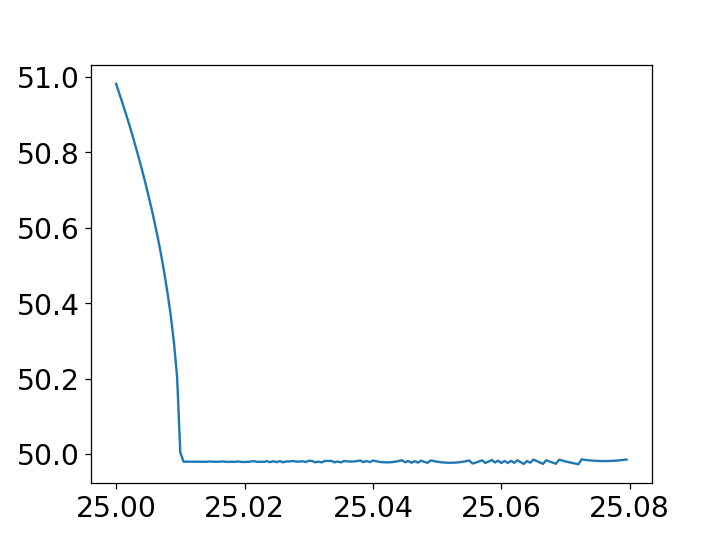

In [23]:
plt.figure()
plt.plot(deltas,min_vel)